In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5213 - acc: 0.4447 - val_loss: 1.2481 - val_acc: 0.5558
Epoch 2/10
50000/50000 [==============================] - 6s 125us/sample - loss: 1.1669 - acc: 0.5878 - val_loss: 1.0867 - val_acc: 0.6115
Epoch 3/10
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0113 - acc: 0.6456 - val_loss: 0.9846 - val_acc: 0.6487
Epoch 4/10
50000/50000 [==============================] - 6s 116us/sample - loss: 0.9115 - acc: 0.6804 - val_loss: 0.9833 - val_acc: 0.6563
Epoch 5/10
50000/50000 [==============================] - 6s 124us/sample - loss: 0.8392 - acc: 0.7053 - val_loss: 0.8810 - val_acc: 0.6914
Epoch 6/10
50000/50000 [==============================] - 6s 126us/sample - loss: 0.7767 - acc: 0.7274 - val_loss: 0.9338 - val_acc: 0.6785
Epoch 7/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.7242 - acc: 0.7440 - val_l

10000/10000 - 0s - loss: 0.8718 - acc: 0.7158


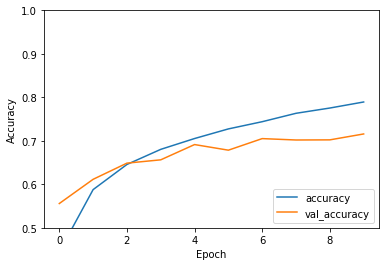

In [9]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# References

https://www.tensorflow.org/tutorials/images/cnn